In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import timedelta
import xarray as xr
from glob import glob
import sys, os
import cartopy
cartopy.config['pre_existing_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
cartopy.config['repo_data_dir'] = '/home1/datawork/kbalem/cartopy_shapefiles/'
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=[0.4,0.6,0.7])
pr1=ccrs.PlateCarree()

In [16]:
dout=xr.open_zarr('/home1/scratch/kbalem/8j9eibcz.zarr')
dout.load()

<xarray.Dataset> Size: 335kB
Dimensions:       (trajectory: 16, obs: 372)
Coordinates:
  * obs           (obs) int32 1kB 0 1 2 3 4 5 6 ... 365 366 367 368 369 370 371
  * trajectory    (trajectory) int64 128B 32 33 34 35 36 37 ... 43 44 45 46 47
Data variables:
    cycle_age     (trajectory, obs) float32 24kB 300.0 3.9e+03 ... 4.719e+05
    cycle_number  (trajectory, obs) float64 48kB 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0
    cycle_phase   (trajectory, obs) float64 48kB 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    in_water      (trajectory, obs) float32 24kB 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    lat           (trajectory, obs) float64 48kB 31.0 31.0 31.01 ... 31.7 31.69
    lon           (trajectory, obs) float64 48kB -17.0 -17.0 ... -16.25 -16.25
    time          (trajectory, obs) datetime64[ns] 48kB 2008-06-01T12:00:00 ....
    z             (trajectory, obs) float64 48kB 2.5 326.5 650.5 ... 1e+03 1e+03
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        ArgoParticleArgoFloatKernelAdvectionRK4KeepInWate...
    parcels_mesh:           spherical
    parcels_version:        3.1.0

In [9]:
files = glob('/scale/project/shom_simurep/public_no_ftp/PROJETS/IberArgo/Data/GIGATL/NEW_DOMAIN_WITH_DEPTHS/*.nc')
files.sort()
ds = xr.open_dataset(files[0])

In [12]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:     (y_rho: 1400, x_rho: 1155, y_v: 1400, x_u: 1155, one: 1,
                 time: 1, sig_rho: 100)
Coordinates:
    lon_rho     (y_rho, x_rho) float64 13MB ...
    lat_rho     (y_rho, x_rho) float64 13MB ...
    lon_psi     (y_v, x_u) float64 13MB ...
    lat_psi     (y_v, x_u) float64 13MB ...
    lon_u       (y_rho, x_u) float64 13MB ...
    lat_u       (y_rho, x_u) float64 13MB ...
    lon_v       (y_v, x_rho) float64 13MB ...
    lat_v       (y_v, x_rho) float64 13MB ...
  * time        (time) datetime64[ns] 8B 2008-03-14
Dimensions without coordinates: y_rho, x_rho, y_v, x_u, one, sig_rho
Data variables: (12/15)
    angle       (y_rho, x_rho) float64 13MB ...
    corio       (y_rho, x_rho) float64 13MB ...
    ex          (y_rho, x_rho) float64 13MB ...
    ey          (y_rho, x_rho) float64 13MB ...
    mask_rho    (y_rho, x_rho) float64 13MB ...
    xl          (one) float64 8B ...
    ...          ...
    sal         (time, sig_rho, y_rho, x_rho) float32 647MB ...
    u           (time, sig_rho, y_rho, x_u) float32 647MB ...
    v           (time, sig_rho, y_v, x_rho) float32 647MB ...
    ocean_time  (time) float32 4B ...
    bathy       (y_rho, x_rho) float64 13MB ...
    depth_rho   (time, sig_rho, y_rho, x_rho) float32 647MB ...

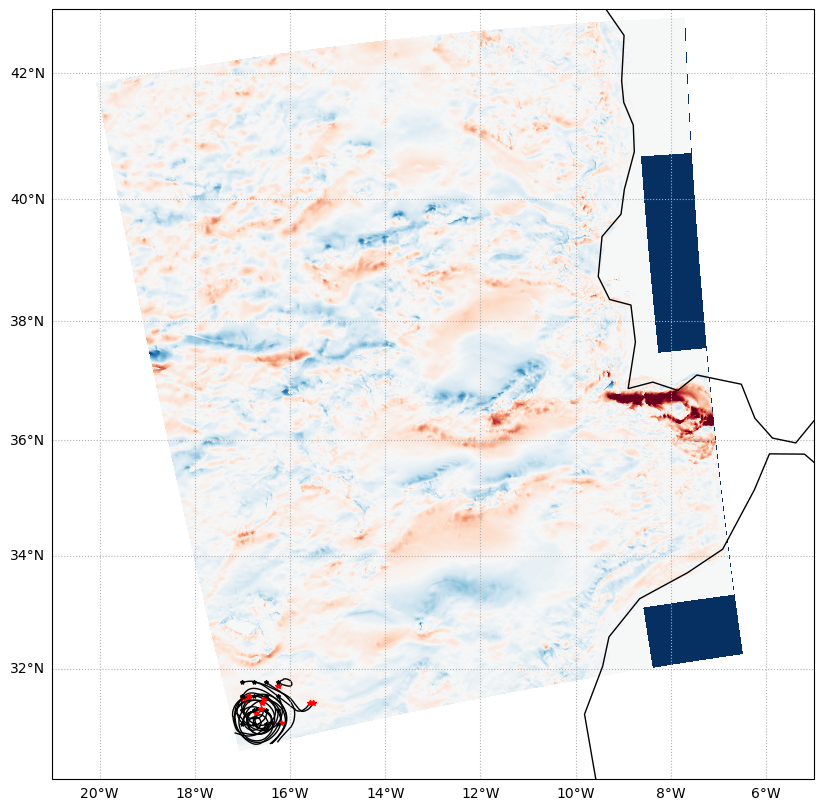

In [18]:
extent = [-21,-5,30,43]

fig=plt.figure(figsize=(12,10))
pr1=ccrs.PlateCarree()
pr2=ccrs.Mercator()

ax1 = fig.add_subplot(projection=pr2)
a=ax1.pcolormesh(ds['lon_rho'],ds['lat_rho'],ds['u'].isel(time=0,sig_rho=0),shading='auto',transform=pr1,vmin=-0.6,vmax=0.6,cmap=plt.get_cmap('RdBu'))
#a=ax1.pcolormesh(mask.longitude,mask.latitude,mask['depth'],shading='auto',transform=pr1,cmap=plt.get_cmap('ocean'),vmin=0)
ax1.coastlines(resolution='110m',zorder=10)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False
for t in range(len(dout.trajectory.values)):
    ax1.plot(dout['lon'].isel(obs=0,trajectory=t),dout['lat'].isel(obs=0,trajectory=t),'k*',markersize=3,transform=pr1,zorder=10)
    ax1.plot(dout['lon'].isel(trajectory=t),dout['lat'].isel(trajectory=t),'k',linewidth=1,transform=pr1)
    ax1.plot(dout['lon'].isel(trajectory=t, obs=-1),dout['lat'].isel(trajectory=t, obs=-1),'r*',markersize=4,transform=pr1)
ax1.set_extent(extent)

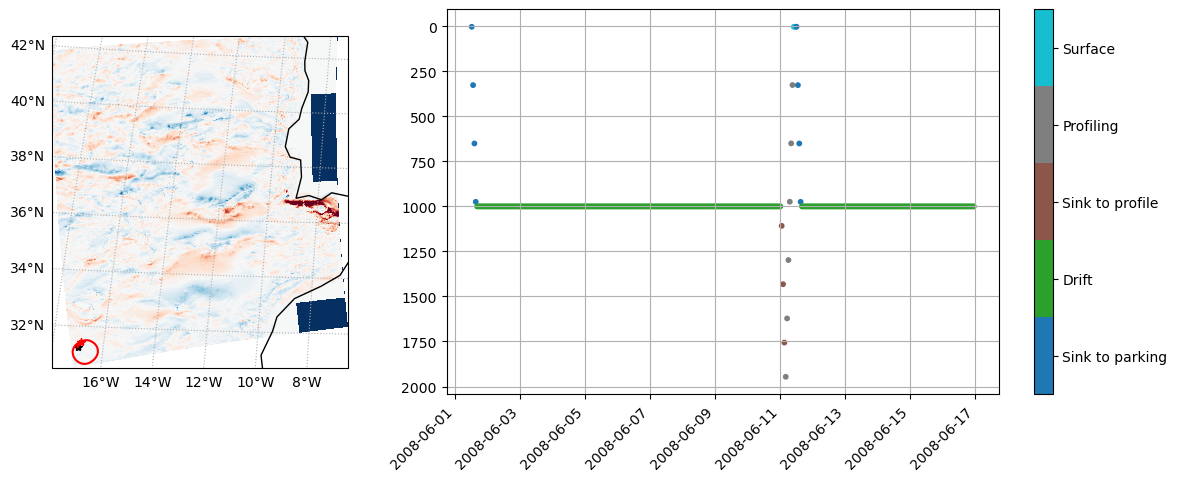

In [22]:
tr=1

fig=plt.figure(figsize=(14,5))
gs = gridspec.GridSpec(1,2,width_ratios=[.6,1.4])
pr1=ccrs.PlateCarree()
pr2=ccrs.LambertAzimuthalEqualArea()
ax1 = fig.add_subplot(gs[0], projection=pr2)
a=ax1.pcolormesh(ds['lon_rho'],ds['lat_rho'],ds['u'].isel(time=0,sig_rho=0),shading='auto',transform=pr1,vmin=-0.6,vmax=0.6,cmap=plt.get_cmap('RdBu'))
ax1.coastlines(resolution='110m',zorder=10)
ga=ax1.gridlines(linestyle=':',draw_labels=True)
ga.top_labels, ga.right_labels = False, False

ax1.plot(dout['lon'].isel(trajectory=tr,obs=0),dout['lat'].isel(trajectory=tr,obs=0),'k*',transform=pr1)
ax1.plot(dout['lon'].isel(trajectory=tr),dout['lat'].isel(trajectory=tr),'r',transform=pr1)
ax1.plot(dout['lon'].isel(trajectory=tr,obs=-1),dout['lat'].isel(trajectory=tr,obs=-1),'r*',transform=pr1)
extent=[dout['lon'].isel(trajectory=tr,obs=-1).min().values -2,
        dout['lon'].isel(trajectory=tr,obs=-1).max().values +2,
        dout['lat'].isel(trajectory=tr,obs=-1).min().values -2,
        dout['lat'].isel(trajectory=tr,obs=-1).max().values +2]
#ax1.set_extent(extent)

ax = fig.add_subplot(gs[1])
a=ax.scatter(dout['time'].isel(trajectory=tr),dout['z'].isel(trajectory=tr),s=10,c=dout['cycle_phase'].isel(trajectory=tr),cmap=plt.get_cmap('tab10',5),vmin=0,vmax=5)
ax.invert_yaxis()
_=plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(':')
#ax.set_xlim([np.datetime64('2011-01-15'),np.datetime64('2011-01-16')])
cb=plt.colorbar(a,ticks=[0.5,1.5,2.5,3.5,4.5])
cb.set_ticklabels(['Sink to parking','Drift','Sink to profile','Profiling','Surface'])